In [1]:
import tensorflow as tf
import keras
import keras.backend as K
print (tf.__version__, keras.__version__)

import os
import sys

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

import numpy as np
import random
from random import randint
import pandas as pd
import seaborn as sns

from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.preprocessing.image import img_to_array
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from PIL import Image
from glob import glob
from tqdm import tqdm, tqdm_notebook

%pylab inline
%matplotlib inline

sys.path.append('script/')
from metrics import *
from ressources import *
from model import *
from weights_path import *
sys.path.append('/root/Keras-ResNeXt/')
from resnext import ResNext

Using TensorFlow backend.


1.12.0 2.2.4
Populating the interactive namespace from numpy and matplotlib


/root/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'maximum', 'minimum', 'copy', 'multiply', 'add', 'randint', 'subtract', 'concatenate', 'dot', 'average']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
name = 'resnet_3'
height, width, channel = 224, 224, 3
batch_size = 32
trainDir = 'TrainingSetImagesDir/'
testDir = 'TestSetImagesDir/'

In [3]:
df_train = pd.read_csv('TrainingSet_20aimVO.csv')
df_test = pd.read_csv('Mauna_Kea_Supp_Material/test_data_order.csv')

In [4]:
classes = ['Squamous_Epithelium', 'Intestinal_metaplasia', 'Gastric_metaplasia', 'Dysplasia_and_Cancer']

In [5]:
labeled_files = glob('TrainingSetImagesDir/*.png')

In [6]:
labeled_files = [lbl for lbl in labeled_files if  lbl.split(os.path.sep)[-1] in list(df_train.image_filename.values)]

In [7]:
print (len(labeled_files))

9446


In [8]:
id_label_map = {k:v for k, v in zip(df_train.image_filename.values, df_train.class_number.values)}

In [9]:
cols = 6
rows = 4

In [10]:
randomLst = []
for i in range(0, (rows * cols)):
    randomLst.append(randint(0, len(labeled_files)))

/root/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


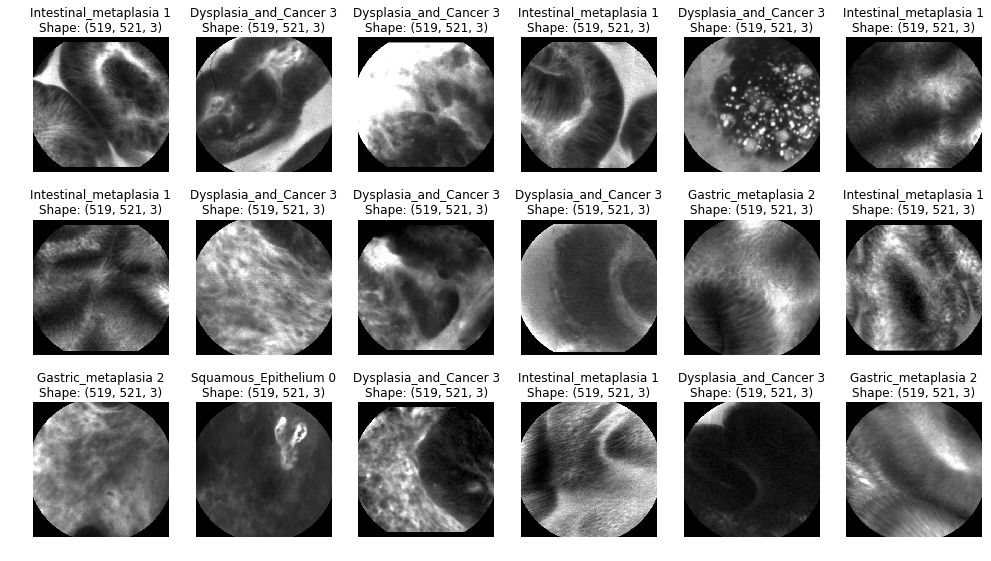

In [11]:
plot_imgs(randomLst, classes, labeled_files, id_label_map, cols=6, rows=3)

In [12]:
imgNameLst = [['TrainingSetImagesDir/{}'.format(name)
           for name in list(df_train.loc[df_train['class_number'] == i].sample(6).image_filename.values)]
            for i in range(0, 4)]

In [13]:
rows = 4
cols = 4

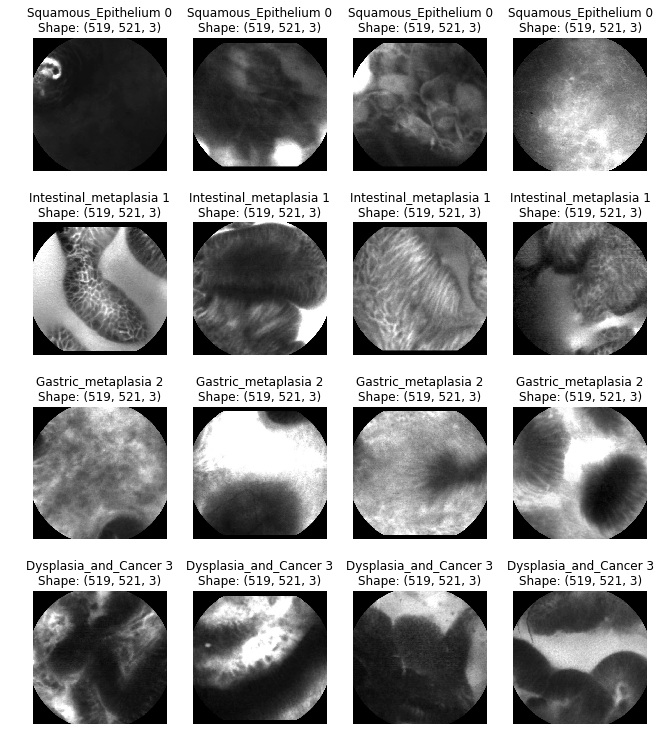

In [14]:
plot_imgs_by_id(imgNameLst, classes, labeled_files, id_label_map, rows, cols)

In [15]:
df_train.image_filename.sample(1).values[0]

'im_199_54.png'

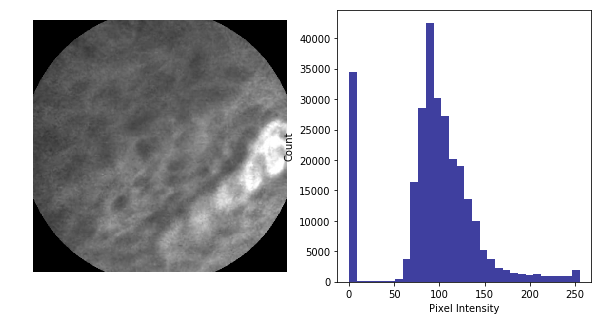

In [16]:
plotHistogram(cv.imread('TrainingSetImagesDir/{}'.format(df_train.image_filename.sample(1).values[0])))   

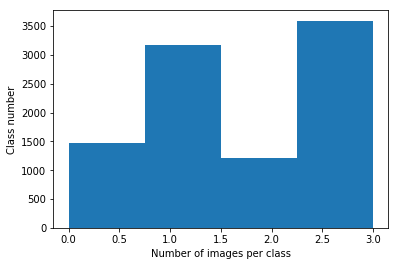

In [17]:
plt.hist(df_train['class_number'].values.astype(int), bins=4)
plt.xlabel('Number of images per class')
plt.ylabel('Class number')
plt.show()

{0: 'Squamous_Epithelium', 1: 'Intestinal_metaplasia', 2: 'Gastric_metaplasia', 3: 'Dysplasia_and_Cancer'}


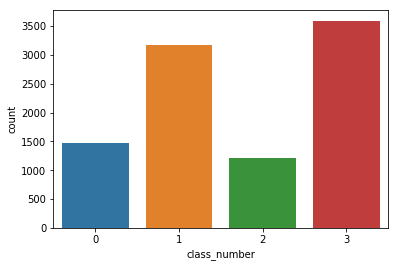

In [18]:
map_characters = {0: 'Squamous_Epithelium', 1: 'Intestinal_metaplasia', 2: 'Gastric_metaplasia', 3: 'Dysplasia_and_Cancer'}
df = pd.DataFrame()
dist = df_train['class_number'].value_counts()
sns.countplot(df_train['class_number'])
print(map_characters)

In [19]:
cw = class_weight.compute_class_weight('balanced', np.unique(df_train['class_number'].values), df_train['class_number'].values)

In [20]:
print (cw)
print (inception_resnet_v2_path)

[1.60755616 0.7433113  1.95812604 0.65706733]
/root/pretrain_model/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5


In [21]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
from keras.optimizers import Adam, RMSprop
from keras.losses import binary_crossentropy, categorical_crossentropy

In [22]:
K.clear_session()

In [23]:
[x for x in dir() if '_path' in x]

['densenet121_path',
 'densenet169_path',
 'densenet201_path',
 'einsum_path',
 'inception_resnet_v2_path',
 'inception_v3_path',
 'mobilenet_path',
 'nasnet_large_path',
 'nasnet_path',
 'resnet50_path',
 'vgg16_path',
 'vgg19_path',
 'xception_path']

In [24]:
from keras.applications.densenet import DenseNet201
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet201
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16

In [25]:
weights = resnet50_path
pretrained_model = ResNet50(weights=weights, include_top=False)

model = get_model_1(pretrained_model, 4, 0)
# model = get_model_classif_nasnet(pretrained_model, 4)

/root/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [26]:
X = df_train.iloc[:, 0]
y = df_train.iloc[:, 1]

In [27]:
from sklearn.model_selection import KFold

In [28]:
cv = KFold(n_splits=3, random_state=42, shuffle=False)

In [29]:
def evaluate_model(train_gen, val_gen, class_weights):
    K.clear_session()
    weights = resnet50_path
    pretrained_model = ResNet50(weights=weights, include_top=False)
    model = get_model_1(pretrained_model, 4, 0)
    history = model.fit_generator(
            train_gen,
            steps_per_epoch = len(train_gen.filenames) // batch_size,
            validation_data = val_gen,
            validation_steps = len(val_gen.filenames) // batch_size,
            epochs = 1,
            verbose = 1,
            callbacks = [checkpoint, reduce_lr, earlyStp],
            class_weight = class_weights)
    return (model, history.history['val_acc'])

In [30]:
filepath = './model2/{}_{}'.format(name, 'weights.{epoch:02d}-{loss:.2f}-{acc:.2f}-{val_loss:.2f}-{val_acc:.2f}.hdf5')
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc',
                              factor=0.5,
                              patience=1,
                              verbose=1,
                              mode='max',
                              min_lr=0.00001)

earlyStp = EarlyStopping(monitor='val_loss',
                         min_delta=1e-5,
                         patience=3,
                         verbose=1,
                         mode='auto')

In [31]:
df_train.class_number.value_counts()

3    3594
1    3177
0    1469
2    1206
Name: class_number, dtype: int64

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [33]:
scores, members = list(), list()

In [34]:
# cv = KFold(n_splits=3, random_state=42, shuffle=False)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, train_size=0.8, random_state=4242)

In [35]:
from sklearn.datasets.samples_generator import make_blobs

In [53]:
for ind, (train_index, test_index) in enumerate(cv.split(X, y)):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    df_k_train = pd.DataFrame({'image_filename':X_train, 'class_number':y_train.astype('str')})
    df_k_test = pd.DataFrame({'image_filename':X_test, 'class_number':y_test.astype('str')})
    print (df_k_train.class_number.value_counts())
    print ('-----------')
    print (df_k_test.class_number.value_counts())
    datagen = datagen_create(True)
    train_gen=datagen.flow_from_dataframe(directory=trainDir,
                                            dataframe=df_k_train,
                                            x_col="image_filename",
                                            y_col="class_number",
                                            class_mode="categorical",
                                            target_size=(height, width),
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=42)
    datagen = datagen_create()
    val_gen = datagen.flow_from_dataframe(directory=trainDir,
                                            dataframe=df_k_test,
                                            x_col="image_filename",
                                            y_col="class_number",
                                            class_mode="categorical",
                                            target_size=(height, width),
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=42)

    name = 'res_fold{}'.format(ind)
    filepath = './model2/{}_{}'.format(name, 'weights.{epoch:02d}-{loss:.2f}-{acc:.2f}-{val_loss:.2f}-{val_acc:.2f}.hdf5')
    checkpoint = ModelCheckpoint(filepath,
                                monitor='val_acc',
                                verbose=1,
                                save_best_only=True,
                                mode='max')
    class_weights = class_weight.compute_class_weight(
       'balanced',
        np.unique(train_gen.classes), 
        train_gen.classes)
    K.clear_session()
    weights = resnet50_path
    pretrained_model = ResNet50(weights=weights, include_top=False)
    
    model = get_model_1(pretrained_model, 4, 0)
    history = model.fit_generator(
        train_gen,
        steps_per_epoch = len(train_gen.filenames) // batch_size,
        validation_data = val_gen,
        validation_steps = len(val_gen.filenames) // batch_size,
        epochs = 30,
        verbose = 1,
        callbacks = [checkpoint, reduce_lr, earlyStp],
        class_weight = class_weights)
    
#     model, test_acc = evaluate_model(train_generator, validation_generator, class_weights)
#     members.append(model)
    scores.append(history.history['val_acc'])

Found 7556 validated image filenames belonging to 4 classes.
Found 1890 validated image filenames belonging to 4 classes.


/root/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/30
236/236 [==============================] - 108s 456ms/step - loss: 0.4786 - acc: 0.8197 - val_loss: 0.3882 - val_acc: 0.9020

Epoch 00001: val_acc improved from -inf to 0.90201, saving model to ./model2/res_fold0_weights.01-0.48-0.82-0.39-0.90.hdf5
Epoch 2/30
236/236 [==============================] - 99s 420ms/step - loss: 0.2207 - acc: 0.9219 - val_loss: 0.2169 - val_acc: 0.9338

Epoch 00002: val_acc improved from 0.90201 to 0.93380, saving model to ./model2/res_fold0_weights.02-0.22-0.92-0.22-0.93.hdf5
Epoch 3/30
236/236 [==============================] - 99s 418ms/step - loss: 0.2132 - acc: 0.9288 - val_loss: 0.5215 - val_acc: 0.8515

Epoch 00003: val_acc did not improve from 0.93380

Epoch 00003: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 4/30
236/236 [==============================] - 99s 418ms/step - loss: 0.1320 - acc: 0.9514 - val_loss: 0.0710 - val_acc: 0.9763

Epoch 00004: val_acc improved from 0.93380 to 0.97632, saving model to ./mo

236/236 [==============================] - 99s 418ms/step - loss: 0.0593 - acc: 0.9820 - val_loss: 0.0282 - val_acc: 0.9898

Epoch 00012: val_acc did not improve from 0.98977

Epoch 00012: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 13/30
236/236 [==============================] - 99s 419ms/step - loss: 0.0386 - acc: 0.9876 - val_loss: 0.0346 - val_acc: 0.9865

Epoch 00013: val_acc did not improve from 0.98977
Epoch 14/30
236/236 [==============================] - 99s 418ms/step - loss: 0.0400 - acc: 0.9861 - val_loss: 0.0330 - val_acc: 0.9892

Epoch 00014: val_acc did not improve from 0.98977
Epoch 15/30
236/236 [==============================] - 99s 419ms/step - loss: 0.0364 - acc: 0.9862 - val_loss: 0.0305 - val_acc: 0.9930

Epoch 00015: val_acc improved from 0.98977 to 0.99300, saving model to ./model2/res_fold2_weights.15-0.03-0.99-0.03-0.99.hdf5
Epoch 00015: early stopping


In [56]:
values = df_train.class_number.value_counts()

In [58]:
values /= np.sum(values)
values *= 100

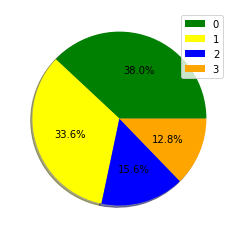

In [59]:
labels = ['0', '1', '2', '3']
colors = ['green', 'yellow', 'blue', 'orange']
plt.pie(values, colors=colors,autopct='%1.1f%%', shadow=True)
plt.legend(labels,loc='best')
plt.show()

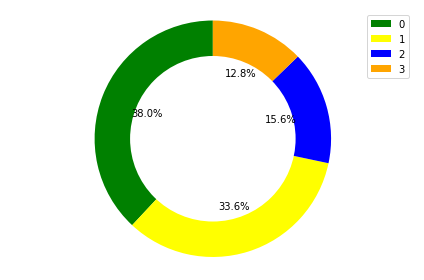

In [60]:
fig1, ax1 = plt.subplots()
ax1.pie(values, colors= colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.legend(labels)
plt.tight_layout()
plt.show()

In [41]:
from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax

In [42]:
print ('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))

Estimated Accuracy 0.885 (0.044)


In [100]:
datagen = datagen_create()

In [101]:
val_gen = datagen.flow_from_dataframe(directory=trainDir,
                                            dataframe=val,
                                            x_col="image_filename",
                                            y_col="class_number",
                                            class_mode="categorical",
                                            target_size=(height, width),
                                            batch_size=1,
                                            shuffle=False,
                                            seed=42)

Found 1323 validated image filenames belonging to 4 classes.


In [102]:
n_folds = 3
num_test_images = len(val_gen.filenames)
# print (num_test_images)

In [103]:
yhat = list()

In [104]:
# ./model2/res_fold1_weights.03-0.21-0.93-0.22-0.94.hdf5
# ./model2/res_fold2_weights.15-0.03-0.99-0.03-0.99.hdf5
model.load_weights('./model2/res_fold1_weights.03-0.21-0.93-0.22-0.94.hdf5')

In [105]:
predictions = model.predict_generator(val_gen, steps=(num_test_images), verbose=1)

1323/1323 [==============================] - 15s 12ms/step


In [106]:
y_pred_val_classes = np.argmax(predictions, axis=1)

y_pred_val_max_probas = np.max(predictions, axis=1)

In [107]:
print (len(y_pred_val_classes), len(y_pred_val_max_probas))

1323 1323


In [108]:
confusion_matrix(val_gen.classes, y_pred_val_classes)

array([[196,   2,   9,   6],
       [  0, 440,   3,   5],
       [  0,  19, 140,  17],
       [  0,   8,   6, 472]])

In [109]:
# y_pred_val_fold1 = y_pred_val_classes

In [131]:
combined = np.vstack((y_pred_val_fold0, y_pred_val_fold2)).T
result = [np.bincount(x).argmax() for x in combined]

In [132]:
confusion_matrix(val_gen.classes, result)

array([[213,   0,   0,   0],
       [  0, 448,   0,   0],
       [  1,   3, 171,   1],
       [  1,   2,   0, 483]])

In [133]:
# y_pred_val_fold1
# y_pred_val_fold2
# y_pred_val_fold3

In [134]:
accuracy_score(val_gen.classes, result)

0.9939531368102796

In [136]:
print (accuracy_score(val_gen.classes, y_pred_val_fold0))
print (accuracy_score(val_gen.classes, y_pred_val_fold1))
print (accuracy_score(val_gen.classes, y_pred_val_fold2))

0.9954648526077098
0.9433106575963719
0.9962207105064248


In [110]:
# y_pred_val_fold0 = y_pred_val_classes

In [114]:
# y_pred_val_fold2 = y_pred_val_fold1

In [115]:
# y_pred_val_fold1 = y_pred_val_fol3

In [116]:
# indices = [i for i,v in enumerate(y_pred_val_classes) if y_pred_val_classes[i]!=val_gen.classes[i]]

In [117]:
# subset_of_wrongly_predicted_fold1 = [val_gen.filenames[i] for i in indices]

In [94]:
# subset_of_wrongly_predicted_fold0 = [val_gen.filenames[i] for i in indices]

In [91]:
# subset_of_wrongly_predicted_fold2 = subset_of_wrongly_predicted_fold1

In [71]:
# for i in range(1, n_folds+1):
#     predictions = [model.predict_generator(validation_generator, steps=num_test_images, verbose=1) for model in members]
#     yhat.append(predictions)
#     ensemble_score = evaluate_n_members(members, i)
#     print('> %d: single=%.3f, ensemble=%.3f' % (i, ensemble_score))

In [ ]:
subset_of_wrongly_predicted